# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
pprint(requests.get(query_url).json())

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 33.57, 'lon': -117.64},
 'dt': 1594858440,
 'id': 5364199,
 'main': {'feels_like': 79.68,
          'humidity': 67,
          'pressure': 1012,
          'temp': 76.69,
          'temp_max': 82,
          'temp_min': 71.01},
 'name': 'Ladera Ranch',
 'sys': {'country': 'US',
         'id': 2021171,
         'sunrise': 1594817498,
         'sunset': 1594868467,
         'type': 3},
 'timezone': -25200,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'gust': 8.99, 'speed': 4}}


In [8]:
#bringing in the url and setting a variable to the unit type that I will need
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

#build out the query url that I will use in my loop
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

#set up all of the lists of data that I will collect and set my initial counter
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

set_counter = 1
record_counter = 0

#build the for loop that will count the records and append the data to the appropriate lists
print('Beginning Data Retrieval')
print('______________________________')

for city in cities:
    
    if record_counter <50:
        
        record_counter += 1
    
    else:
        
        set_counter = set_counter +1
        record_counter = 0
    
    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    
    try: 
        
        response_json = requests.get(query_url + city).json()
    
        city_name.append(response_json['name'])
        latitude.append(response_json['coord']['lat'])
        longitude.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
    
    except:
        print(f"City not found. Skipping...")
    
        pass
              
print('______________________________') 
              
print('Data Retrieval Complete')
print('______________________________')              
              

Beginning Data Retrieval
______________________________
Processing Record 1 of Set 1 | trairi
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | te anau
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | viedma
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | general pico
Processing Record 14 of Set 1 | deputatskiy
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | alice springs
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | thomps

Processing Record 36 of Set 4 | taoudenni
Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | brownsville
Processing Record 39 of Set 4 | pokhara
Processing Record 40 of Set 4 | saint-joseph
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | puerto colombia
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | matara
Processing Record 47 of Set 4 | oga
Processing Record 48 of Set 4 | troitskoye
Processing Record 49 of Set 4 | surt
Processing Record 50 of Set 4 | lakes entrance
Processing Record 0 of Set 5 | shimoda
Processing Record 1 of Set 5 | upington
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | bulgan
Processing Record 4 of Set 5 | wokha
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | novyy urengoy
Processing Record 7 of Set 5 | mogadishu
Processing Record 8 of Set 5 | sarangani
Processing Recor

Processing Record 21 of Set 8 | axim
Processing Record 22 of Set 8 | svetlogorsk
Processing Record 23 of Set 8 | samaro
Processing Record 24 of Set 8 | ayan
Processing Record 25 of Set 8 | comodoro rivadavia
Processing Record 26 of Set 8 | kouango
Processing Record 27 of Set 8 | mayo
Processing Record 28 of Set 8 | nongan
Processing Record 29 of Set 8 | chichimila
Processing Record 30 of Set 8 | popondetta
Processing Record 31 of Set 8 | pisco
Processing Record 32 of Set 8 | kalmunai
Processing Record 33 of Set 8 | miandrivazo
Processing Record 34 of Set 8 | meulaboh
Processing Record 35 of Set 8 | berkakit
Processing Record 36 of Set 8 | kerema
Processing Record 37 of Set 8 | aromashevo
Processing Record 38 of Set 8 | pallasovka
Processing Record 39 of Set 8 | palmer
Processing Record 40 of Set 8 | kalat
Processing Record 41 of Set 8 | samusu
City not found. Skipping...
Processing Record 42 of Set 8 | coulihaut
City not found. Skipping...
Processing Record 43 of Set 8 | dicabisagan
Pr

City not found. Skipping...
Processing Record 5 of Set 12 | tommot
Processing Record 6 of Set 12 | pavda
City not found. Skipping...
Processing Record 7 of Set 12 | pafos
Processing Record 8 of Set 12 | harindanga
Processing Record 9 of Set 12 | martin
Processing Record 10 of Set 12 | winburg
Processing Record 11 of Set 12 | severodvinsk
Processing Record 12 of Set 12 | jennings
Processing Record 13 of Set 12 | gostyn
Processing Record 14 of Set 12 | grand forks
Processing Record 15 of Set 12 | haines junction
Processing Record 16 of Set 12 | los chiles
Processing Record 17 of Set 12 | kentau
Processing Record 18 of Set 12 | glens falls
Processing Record 19 of Set 12 | abejorral
Processing Record 20 of Set 12 | pochutla
Processing Record 21 of Set 12 | bilibino
Processing Record 22 of Set 12 | arkhangelsk
Processing Record 23 of Set 12 | kochevo
Processing Record 24 of Set 12 | wad rawah
Processing Record 25 of Set 12 | yambio
Processing Record 26 of Set 12 | wahiawa
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [183]:
#creating the new dataframe

city_data_df = pd.DataFrame({
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

#showing the count of each column

city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [184]:
#showing the first five rows of the dataframe

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Trairi,-3.28,-39.27,86.85,48,0,13.11,BR,1595003273
1,Saskylakh,71.92,114.08,49.98,87,100,10.80,RU,1595003496
2,Hilo,19.73,-155.09,73.40,83,90,4.70,US,1595003270
3,Iqaluit,63.75,-68.51,50.00,100,90,2.24,CA,1595003497
4,Te Anau,-45.42,167.72,30.56,94,0,0.85,NZ,1595003497


In [185]:
#exporting our results to a csv file

city_data_df.to_csv("../output_data/cities.csv", index=False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [186]:
#checking to see if any location has a max humidity value of over 100%
city_data_df.describe()

#Please note there are no cities with humidity above 100...as shown in the table below

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.773461,19.294481,69.920091,67.703097,49.054645,7.941056,1.595004e+09
std,34.199807,90.295524,14.986659,21.626246,37.213488,5.436129,9.815562e+01
min,-54.800000,-175.200000,28.830000,2.000000,0.000000,0.450000,1.595003e+09
25%,-8.110000,-63.870000,59.000000,56.000000,14.000000,4.120000,1.595004e+09
50%,25.380000,24.730000,71.600000,72.000000,40.000000,6.510000,1.595004e+09
75%,50.280000,98.780000,80.600000,84.000000,90.000000,11.010000,1.595004e+09
max,78.220000,179.320000,113.830000,100.000000,100.000000,34.180000,1.595004e+09


In [187]:
#  Get the indices of cities that have humidity over 100%.

#Note - no cities with humidity over 100%

In [188]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Note - no cities with humidity over 100%

In [189]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv

#Note - no cities with humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

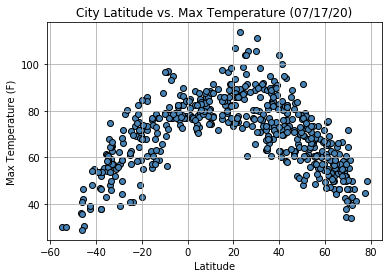

In [190]:

#plotting a scatter plot and saving the figure
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], facecolor='steelblue', edgecolor = 'black')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (07/17/20)')
plt.grid(True)

plt.savefig("../Images/City Latitude vs. Max Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

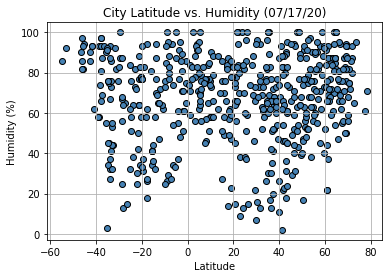

In [191]:
#plotting a scatter plot and saving the figure
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], facecolor='steelblue', edgecolor = 'black')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (07/17/20)')
plt.grid(True)

plt.savefig("../Images/City Latitude vs. Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

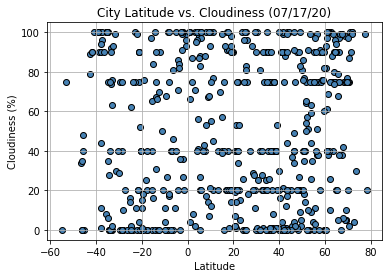

In [192]:
#plotting a scatter plot and saving the figure
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], facecolor='steelblue', edgecolor = 'black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (07/17/20)')
plt.grid(True)

plt.savefig("../Images/City Latitude vs. Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

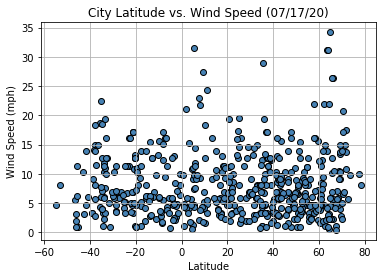

In [193]:
#plotting a scatter plot and saving the figure
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], facecolor='steelblue', edgecolor = 'black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (07/17/20)')
plt.grid(True)

plt.savefig("../Images/City Latitude vs. Wind Speed.png")

plt.show()

## Linear Regression

In [194]:
# Create a function to create Linear Regression plots

def linear_regression(x_value,y_value):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value,y_value)
    
    regress_values = x_value * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, "r-")
    plt.xlabel('Latitude')
    
    #creating a new dataframe so I can pull the column name
    y_label_df = pd.DataFrame(y_value)
    
    #with the new column name I am setting a variable that I can use to label the y-axis in my function
    for column_name in y_label_df.columns:
        y_label = column_name
        
    plt.ylabel(y_label)
    
    #setting values to variables so I know my annotation will always appear on the graph
    x_min = x_value.min()
    y_min = y_value.min()
    
    plt.annotate(line_eq, (x_min,y_min + 5), fontsize = 15, color ='red', weight = 'bold')
    
    print(f" The r-squared value is {rvalue **2}")


In [195]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = city_data_df.loc[city_data_df['Lat']>0]
southern_hemisphere = city_data_df.loc[city_data_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared value is 0.5086414506362557


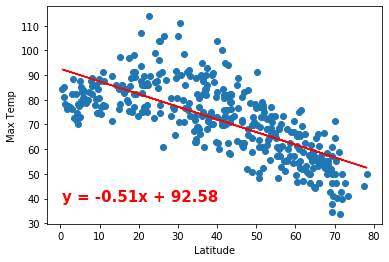

In [196]:
#plotting a scatter plot and saving the figure

nh_max_temp = linear_regression(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'])

plt.savefig("../Images/Northern Hemisphere City Latitude vs. Max Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared value is 0.6278065645062352


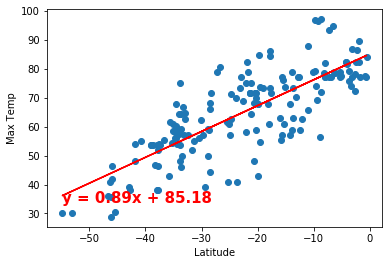

In [197]:
#plotting a scatter plot and saving the figure

sh_max_temp = linear_regression(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'])

plt.savefig("../Images/Southern Hemisphere City Latitude vs. Max Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared value is 0.004870301112354305


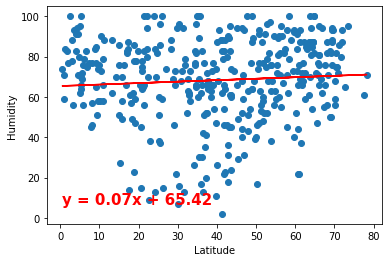

In [198]:
#plotting a scatter plot and saving the figure

nh_humidity = linear_regression(northern_hemisphere['Lat'], northern_hemisphere['Humidity'])

plt.savefig("../Images/Northern Hemisphere City Latitude vs. Humidity(%).png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared value is 0.01900065996334186


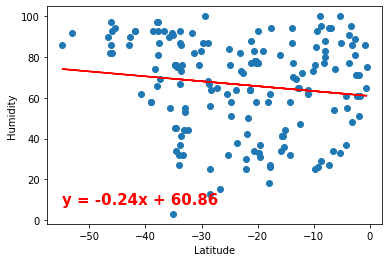

In [199]:
#plotting a scatter plot and saving the figure

sh_humidity = linear_regression(southern_hemisphere['Lat'], southern_hemisphere['Humidity'])

plt.savefig("../Images/Southern Hemisphere City Latitude vs. Humidity(%).png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared value is 0.0031947511125187903


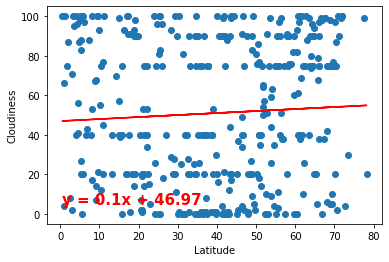

In [200]:
#plotting a scatter plot and saving the figure

nh_cloudiness = linear_regression(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'])

plt.savefig("../Images/Northern Hemisphere City Latitude vs. Cloudiness(%).png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared value is 1.0809152348351946e-05


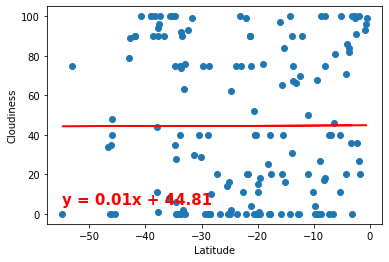

In [201]:
#plotting a scatter plot and saving the figure

sh_cloudiness = linear_regression(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'])

plt.savefig("../Images/Southern Hemisphere City Latitude vs. Cloudiness(%).png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared value is 0.0002275790697562362


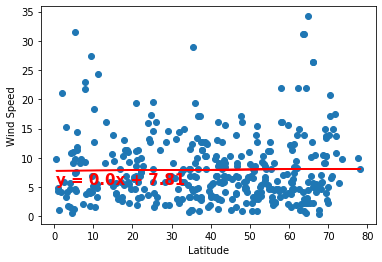

In [202]:
#plotting a scatter plot and saving the figure

nh_wind_speed = linear_regression(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'])

plt.savefig("../Images/Northern Hemisphere City Latitude vs. Wind Speed(mph).png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared value is 0.005490909373530771


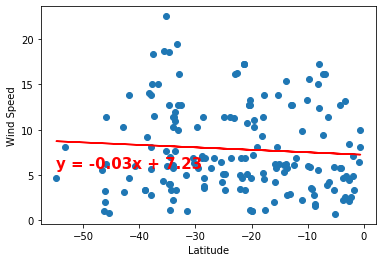

In [203]:
#plotting a scatter plot and saving the figure

sh_wind_speed = linear_regression(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'])

plt.savefig("../Images/Southern Hemisphere City Latitude vs. Wind Speed(mph).png")